In [ ]:
#Data Science CA1 code
#Topic: Cryptocurrency Data analysis and prediction
#Group: Chi ieong Ng C00223421, Jonathan Suryadiputra C00235450, Weihao Liao C00253515
#Submission Date: 18 Feb 2022

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime as dt
from prophet import Prophet

In [ ]:
# Prophet module

In [ ]:
#Bitcoin

In [17]:
#use panda to import bitcoin daily rates data from csv file
df_btc = pd.read_csv("gemini_BTCUSD_day.csv", usecols = ['Date','Close'])

In [18]:
df_btc.index = df_btc.index[::-1]
df_btc = df_btc.reindex(index=df_btc.index[::-1])
df_date = [None] * len(df_btc['Date'])
for index, i in enumerate(df_btc['Date']):
   df_date[index] = i[6:10] + '-'+ i[3:5] + '-' + i[0:2]
df_btc['Date'] = df_date

In [19]:
df_btc['Date']

0       2015-10-08
1       2015-10-09
2       2015-10-10
3       2015-10-11
4       2015-10-12
           ...    
2289    2022-01-13
2290    2022-01-14
2291    2022-01-15
2292    2022-01-16
2293    2022-01-17
Name: Date, Length: 2294, dtype: object

In [20]:
df_btc.rename(columns = {'Date':'ds', 'Close':'y' }, inplace = True)

In [22]:
df_btc.head()

,ds,y
0,2015-10-08,243.60
1,2015-10-09,245.51
2,2015-10-10,246.30
3,2015-10-11,248.98
4,2015-10-12,245.75


In [41]:
model_btc = Prophet(daily_seasonality = False, weekly_seasonality = False, yearly_seasonality = True, seasonality_mode = 'additive', growth = 'linear')
model_btc.fit(df_btc)

Initial log joint probability = -47.1663


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4645.91    0.00354742       251.774        0.14      0.7592      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4671.56    0.00138324       103.418      0.6415      0.6415      253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     269        4674.6   0.000273913       84.0749   7.646e-07       0.001      381  LS failed, Hessian reset 
     299       4676.28    0.00126933       165.882           1           1      415   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4678.46    0.00159324       65.0499           1           1      550   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4682.66   2.16461e-05       71.9266           1           1      6

In [42]:
future1_btc = model_btc.make_future_dataframe(periods = 365)
forecast1_btc = model_btc.predict(future1_btc)

In [43]:
forecast1_btc[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2654,2023-01-13,92713.070224,84538.423424,101004.240102
2655,2023-01-14,92849.133294,84776.655337,101471.497187
2656,2023-01-15,92988.582397,84138.093680,101678.679354
2657,2023-01-16,93131.736023,85277.220152,101833.474341
2658,2023-01-17,93278.889916,85027.833631,102228.573841


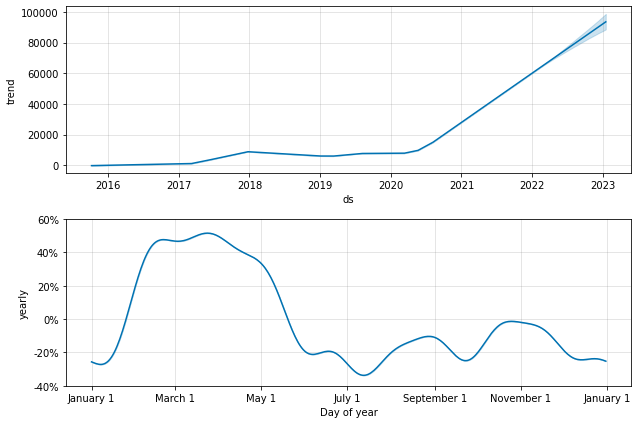

In [65]:
#bitcoin's trend and seasonality in yearly
fig1_btc = model_btc.plot_components(forecast1_btc)

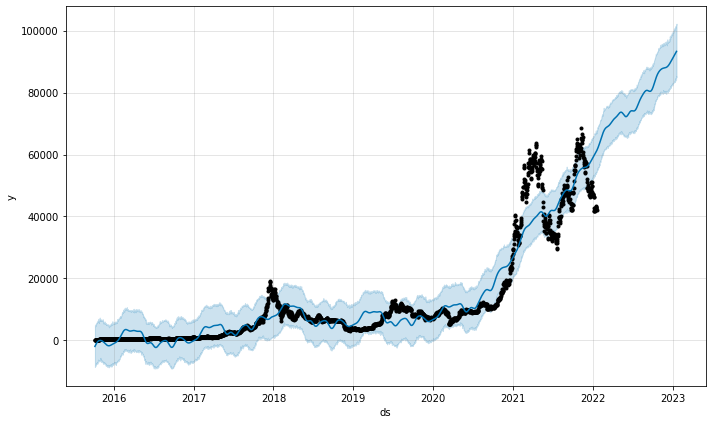

In [44]:
#additive model
fig2_btc = model_btc.plot(forecast1_btc)

Initial log joint probability = -47.1663
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5785.86    0.00996887          1269      0.5231      0.5231      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5867.65     0.0358039       884.373           1           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5913.18    0.00530349       478.783           1           1      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        5930.5     0.0023836        595.76      0.4504           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5939.52    0.00238739       150.819           1           1      592   
    Iter      log prob        ||dx||      ||grad||       alpha  

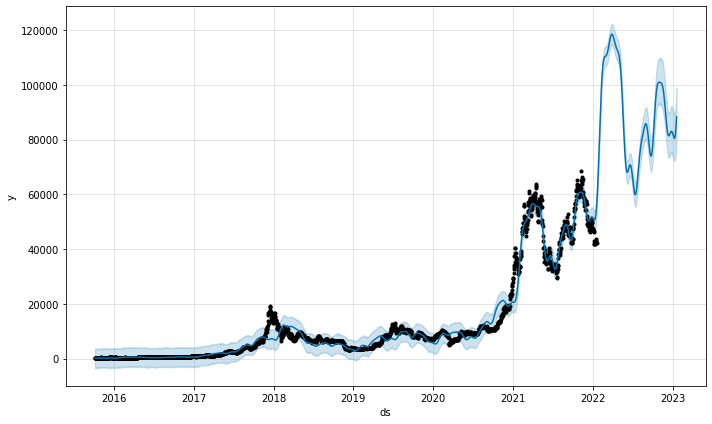

In [58]:
#multiplicative model
model2_btc = Prophet(daily_seasonality = False, weekly_seasonality = False, yearly_seasonality = True, seasonality_mode = 'multiplicative', growth = 'linear')
model2_btc.fit(df_btc)
future2_btc = model2_btc.make_future_dataframe(periods = 365)
forecast2_btc = model2_btc.predict(future2_btc)
fig3_btc = model_btc.plot(forecast2_btc)

In [ ]:
#Ethereum

Initial log joint probability = -64.3724
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4747.22     0.0636292       187.066           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     145        4762.9   0.000366975       264.143   2.083e-06       0.001      214  LS failed, Hessian reset 
     199       4771.28     0.0491106       645.833           1           1      277   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     202       4771.67   0.000284685       182.422   5.706e-07       0.001      332  LS failed, Hessian reset 
     299       4777.59    0.00283615       294.795      0.3133           1      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4781.18    0.00133986       136.406           1           1      584   
    Iter      log pro

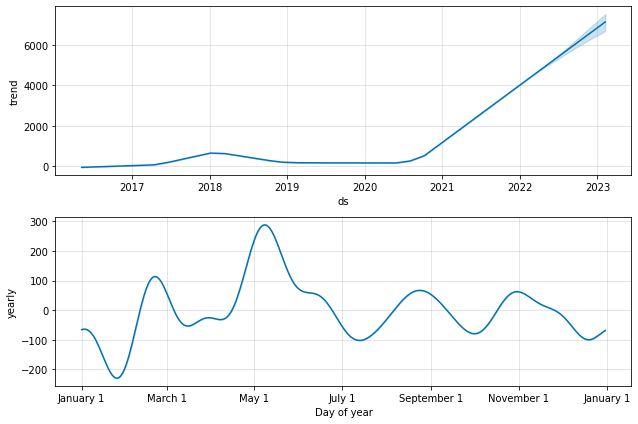

In [68]:
df_eth = pd.read_csv("gemini_ETHUSD_day.csv", usecols = ['Date','Close'])
df_eth.index = df_eth.index[::-1]
df_eth = df_eth.reindex(index=df_eth.index[::-1])
df_date = [None] * len(df_eth['Date'])
for index, i in enumerate(df_eth['Date']):
   df_date[index] = i[6:10] + '-'+ i[3:5] + '-' + i[0:2]
df_eth['Date'] = df_date
df_eth.rename(columns = {'Date':'ds', 'Close':'y' }, inplace = True)
model1_eth = Prophet(daily_seasonality = False, weekly_seasonality = False, yearly_seasonality = True, seasonality_mode = 'additive', growth = 'linear')
model1_eth.fit(df_eth)
future1_eth = model1_eth.make_future_dataframe(periods = 365)
forecast1_eth = model1_eth.predict(future1_eth)
fig1_eth = model1_eth.plot_components(forecast1_eth)

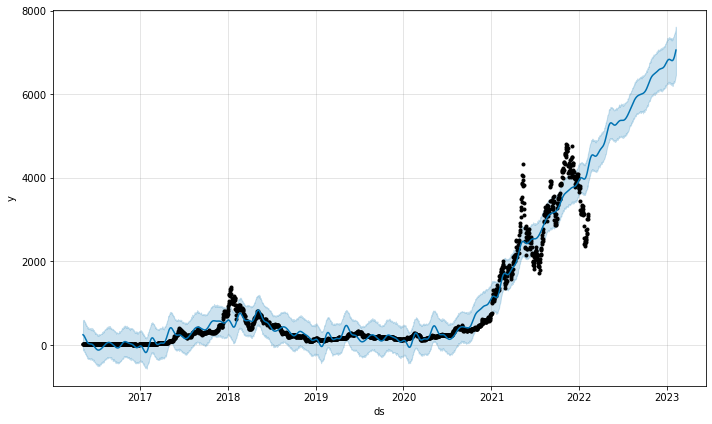

In [69]:
#additive model
fig2_eth = model1_eth.plot(forecast1_eth)

In [ ]:
#multiplicative model

Initial log joint probability = -64.3724
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5768.27     0.0065585       580.451      0.9909      0.9909      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5826.99    0.00300786        263.75           1           1      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5846.24     0.0145968       977.298           1           1      365   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5854.06    0.00256631       185.533           1           1      489   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5860.95     0.0106031       1425.32      0.8885      0.8885      602   
    Iter      log prob        ||dx||      ||grad||       alpha  

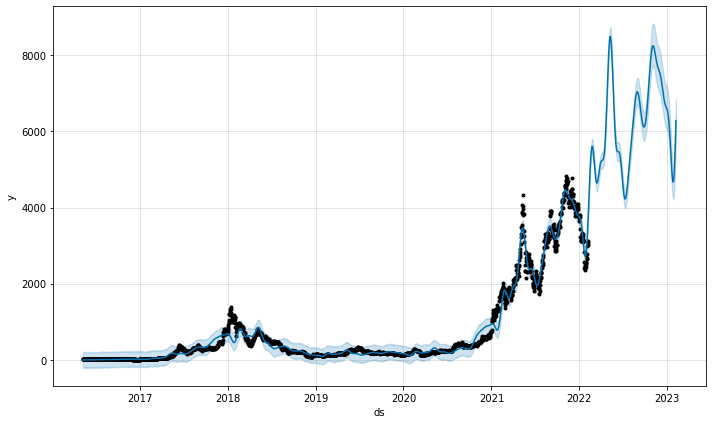

In [70]:
model2_eth = Prophet(daily_seasonality = False, weekly_seasonality = False, yearly_seasonality = True, seasonality_mode = 'multiplicative', growth = 'linear')
model2_eth.fit(df_eth)
future2_eth = model2_eth.make_future_dataframe(periods = 365)
forecast2_eth = model2_eth.predict(future2_eth)
fig3_eth = model2_eth.plot(forecast2_eth)

In [ ]:
#LiteCoin

Initial log joint probability = -12.1658
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2587.65     0.0165541       128.861      0.5982           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     123       2598.79    0.00073999       144.864   6.419e-06       0.001      243  LS failed, Hessian reset 
     198       2609.04   0.000596358       278.136   1.597e-06       0.001      370  LS failed, Hessian reset 
     199       2609.11   0.000356336        228.27           1           1      371   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2618.15   9.88248e-05       74.6435      0.3396      0.3396      497   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     332       2620.08   0.000324561       158.447   1.629e-06       0.001      582  LS failed, Hessian rese

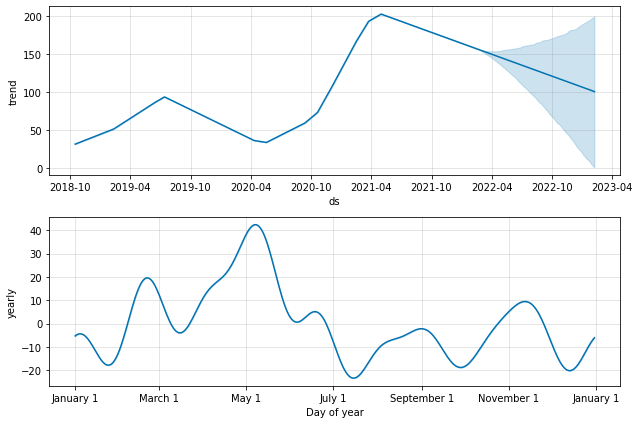

In [77]:
df_ltc = pd.read_csv("gemini_LTCUSD_day.csv", usecols = ['Date','Close'])
df_ltc.index = df_ltc.index[::-1]
df_ltc = df_ltc.reindex(index=df_ltc.index[::-1])
df_date = [None] * len(df_ltc['Date'])
for index, i in enumerate(df_ltc['Date']):
   df_date[index] = i[6:10] + '-'+ i[3:5] + '-' + i[0:2]
df_ltc['Date'] = df_date
df_ltc.rename(columns = {'Date':'ds', 'Close':'y' }, inplace = True)
model1_ltc = Prophet(daily_seasonality = False, weekly_seasonality = False, yearly_seasonality = True, seasonality_mode = 'additive', growth = 'linear')
model1_ltc.fit(df_ltc)
future1_ltc = model1_ltc.make_future_dataframe(periods = 365)
forecast1_ltc = model1_ltc.predict(future1_ltc)
fig1_ltc = model1_ltc.plot_components(forecast1_ltc)

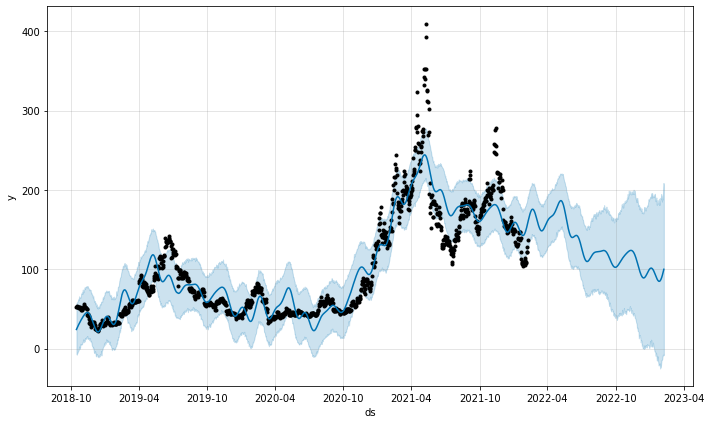

In [80]:
#litecoin model
fig2_ltc = model1_ltc.plot(forecast1_ltc)

Initial log joint probability = -12.1658
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2809.36     0.0252719       788.842      0.4776           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2860.95       0.05604       420.945       2.298      0.2298      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2879.96     0.0072354        177.81      0.4029           1      378   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     374       2890.86   9.67138e-05       94.6542   9.954e-07       0.001      510  LS failed, Hessian reset 
     399       2891.26    0.00048235       113.341       0.604       0.604      543   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     447       2896.12   0.000242132    

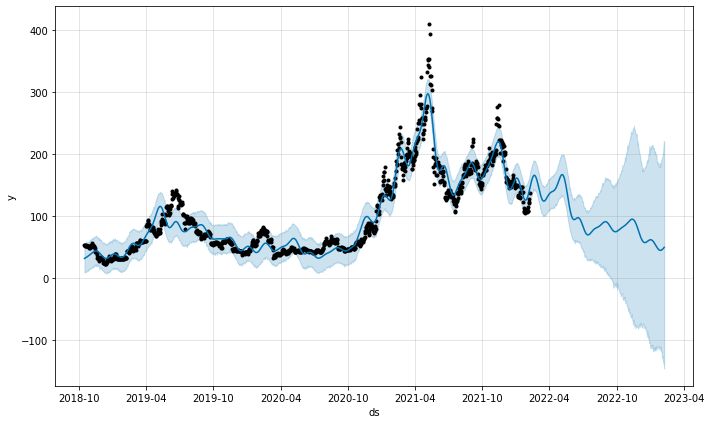

In [79]:
#multiplicative model
model2_ltc = Prophet(daily_seasonality = False, weekly_seasonality = False, yearly_seasonality = True, seasonality_mode = 'multiplicative', growth = 'linear')
model2_ltc.fit(df_ltc)
future2_ltc = model2_ltc.make_future_dataframe(periods = 365)
forecast2_ltc = model2_ltc.predict(future2_ltc)
fig3_ltc = model2_ltc.plot(forecast2_ltc)